# Tutorial 1: Value estimation in classical conditioning using TD-learning 

In [17]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [18]:
class classical_conditioning():
    
    def __init__(self, n_steps):
        
        # Task variables
        self.n_steps = n_steps 
        self.n_actions = 0
        
        # Reward variables
        self.reward_state = [0,0]
        self.reward_magnitude = reward_magnitude
        self.reward_probability = reward_probability
        self.reward_time = reward_time
        
        # Time step at which the conditioned stimulus is presented
        self.cs_time = int(n_steps/4) - 1

        # Create a state dictionary
        self.create_state_dictionary()
    
    def define_reward(self, reward_magnitude, reward_time):
        
        """
        Determine reward state and magnitude of reward
        """
        if reward_time >= self.n_steps - self.cs_time:
            self.reward_magnitude = 0
        
        else:
            self.reward_magnitude = reward_magnitude
            self.reward_state = [1, reward_time]
            
    def get_outcome(self, current_state, action = 0):
    
        """
        Determine next state and reward
        """
        # Update state
        if current_state < self.n_steps - 1: 
            next_state = current_state + 1
        else:
            next_state = 0
            
        # Check for reward
        if self.reward_state == self.state_dict[current_state]:
            reward = self.reward_magnitude
        else:
            reward = 0
        
        return next_state, reward
    
    def create_state_dictionary(self):
        
        """
        This dictionary maps number of time steps/ state identities
        in each episode to some useful state attributes:
        
        state      - 0 1 2 3 4 5 (cs) 6 7 8 9 10 11 12 ...
        is_delay   - 0 0 0 0 0 0 (cs) 1 1 1 1  1  1  1 ...
        t_in_delay - 0 0 0 0 0 0 (cs) 1 2 3 4  5  6  7 ...
        """
        d = 0

        self.state_dict = {}
        for s in range(self.n_steps):
            if s <= self.cs_time:
                self.state_dict[s] = [0,0]
            else: 
                d += 1 # Time in delay           
                self.state_dict[s] = [1,d]
                

### Unless specified otherwise, use the following parameter values:

In [19]:
reward_time = 10
reward_magnitude = 10
reward_probability = 1

n_trials = 20000
n_steps = 40

gamma = 0.98  # temporal discount factor
alpha = 0.001 # learning rate

---

# **Exercise 1**

Implement TD-learning to estimate the state-value function in the classical-conditioning world with guaranteed rewards, with a fixed magnitude, at a fixed delay after the CS. Save TD-errors over learning. 

1. Plot the estimated value function for each state after learning has converged.  
2. Plot TD-errors before learning, during learning and one after the value estimate has converged


In [20]:
env = classical_conditioning(n_steps)
env.define_reward(reward_magnitude, reward_time)

V = np.zeros(n_steps)
RPE = np.zeros((n_steps, n_trials))

for n in range(n_trials):
    
    state = 0
    
    for t in range(n_steps):

        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        RPE[state, n] = reward + gamma * V[next_state] - V[state]
        V[state] += alpha * RPE[state, n] * is_delay
        
        state = next_state

In [21]:
env.state_dict

{0: [0, 0],
 1: [0, 0],
 2: [0, 0],
 3: [0, 0],
 4: [0, 0],
 5: [0, 0],
 6: [0, 0],
 7: [0, 0],
 8: [0, 0],
 9: [0, 0],
 10: [1, 1],
 11: [1, 2],
 12: [1, 3],
 13: [1, 4],
 14: [1, 5],
 15: [1, 6],
 16: [1, 7],
 17: [1, 8],
 18: [1, 9],
 19: [1, 10],
 20: [1, 11],
 21: [1, 12],
 22: [1, 13],
 23: [1, 14],
 24: [1, 15],
 25: [1, 16],
 26: [1, 17],
 27: [1, 18],
 28: [1, 19],
 29: [1, 20],
 30: [1, 21],
 31: [1, 22],
 32: [1, 23],
 33: [1, 24],
 34: [1, 25],
 35: [1, 26],
 36: [1, 27],
 37: [1, 28],
 38: [1, 29],
 39: [1, 30]}

## Ex. 1.1

Estimated value function for each state after learning has converged.  

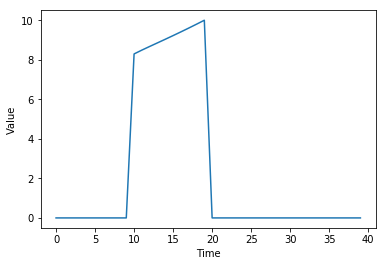

In [22]:
plt.plot(V)
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

## Ex. 1.2 

Reward prediction error after the value estimate has converged.

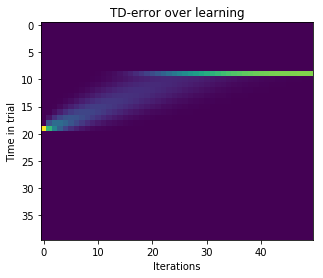

In [23]:
indx = np.arange(0, n_trials, 400)
plt.imshow(RPE[:,indx])
plt.title('TD-error over learning')
plt.ylabel('Time in trial')
plt.xlabel('Iterations')
plt.show()

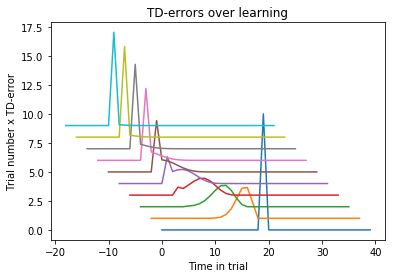

In [24]:
indx = np.arange(0, n_trials, 2000)

for ii, iindx in enumerate(indx):
    plt.plot(np.arange(n_steps) - ii*2, RPE[:,iindx] + ii)

plt.title('TD-errors over learning')
plt.ylabel('Trial number x TD-error')
plt.xlabel('Time in trial')
plt.show()

---

# Exercise 2

Implement TD-learning in the context of rewards of varying magnitudes using a set of discrete reward magnitudes. On each trial, randomly select a reward from the specified set. 

1. For each reward magnitude, plot TD-errors before learning, overlaying all plots.
2. Plot the estimated state-value function for each state after learning has converged.
3. Plot TD-errors on a set of trials (as in (a.)) after learning has converged.



In [26]:
reward_magnitudes = [10, 6, 4, 1]

## Ex. 2.1 

For each reward magnitude, TD-errors before learning.

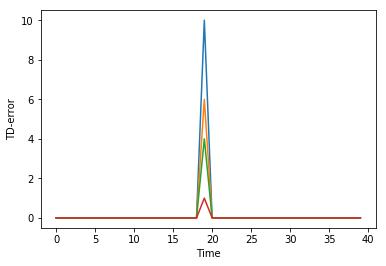

In [27]:
V = np.zeros((n_steps, len(reward_magnitudes)))
RPE = np.zeros((n_steps, len(reward_magnitudes)))

fig = plt.figure()

for i, mag in enumerate(reward_magnitudes):
    
    state = 0
    env.define_reward(mag, reward_time)
    
    for t in range(n_steps):

        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        RPE[state, i] = reward + gamma * V[next_state, i] - V[state, i]
        
        state = next_state

    plt.plot(RPE[:,i])

plt.ylabel('TD-error')
plt.xlabel('Time')
plt.show()

## Ex . 2.2

Estimated state-value function for each state after learning has convered.

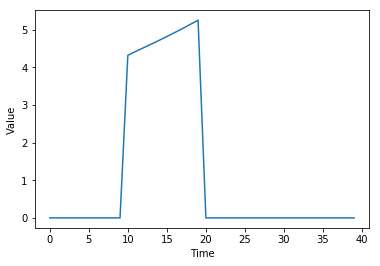

Average reward magnitudes: 5.25


In [28]:
env = classical_conditioning(n_steps)

V = np.zeros(n_steps)
RPE = np.zeros((n_steps, n_trials))

for n in range(n_trials):
    
    state = 0
    env.define_reward(np.random.choice(reward_magnitudes), reward_time)
    
    for t in range(n_steps):

        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        RPE[state, n] = reward + gamma * V[next_state] - V[state]
        V[state] += alpha * RPE[state, n] * is_delay
        
        state = next_state

plt.plot(V)
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

print('Average reward magnitudes:', np.mean(reward_magnitudes))

## Ex 2.3

TD-errors after learning has converged

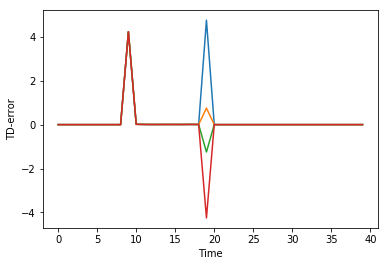

In [29]:
RPE = np.zeros((n_steps, len(reward_magnitudes)))

fig = plt.figure()

for i, mag in enumerate(reward_magnitudes):
    
    state = 0
    env.define_reward(mag, reward_time)
    
    for t in range(n_steps):

        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        RPE[state, i] = reward + gamma * V[next_state] - V[state]
        
        state = next_state

    plt.plot(RPE[:,i])

plt.ylabel('TD-error')
plt.xlabel('Time')
plt.show()

---

# Exercise 3

Implement TD-learning in the context of probabilistic rewards. Determine a probability of reward delivery ($P(r) < 1$) and on each trial randonly determine whether or not to present a reward on that trial. Keep reward magnitude constant.
1. Plot the estimated value function after learning
2. Plot TD-errors on a trial with reward and one with reward omitted, after learning. Overlay the two on the same plot.
3. Repeat (b) and (c) for different probabilities of reward delivery. 

## Ex 3.1 

Value function after learning with probabilistic rewards

In [14]:
reward_probability = 0.8

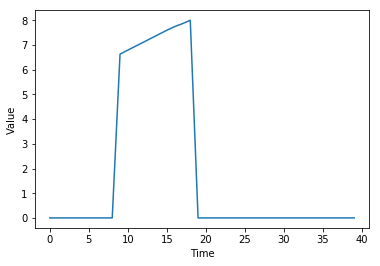

In [15]:
V = np.zeros(n_steps)
RPE = np.zeros(n_steps)

for n in range(n_trials):
    
    state = 0
    
    for t in range(n_steps):

        if np.random.uniform(0,1) < reward_probability:
            env.define_reward(reward_magnitude, reward_time)
        else:
            env.define_reward(0, reward_time)
        
        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        RPE[state] = reward + gamma * V[next_state] - V[state]
        V[state] += alpha * RPE[state] * is_delay
        
        state = next_state
    
plt.plot(V)
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

## Ex 3.2

TD-errors on test trial after learning, one with reward and one with reward omitted.

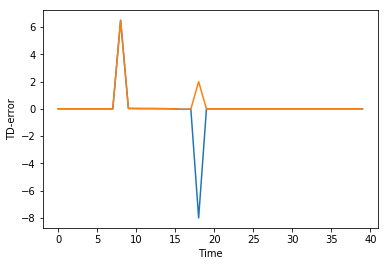

In [16]:
reward_magnitudes = [0,10]
RPE = np.zeros((n_steps, len(reward_magnitudes)))

fig = plt.figure()

for i, mag in enumerate(reward_magnitudes):
    
    state = 0
    env.define_reward(mag, reward_time)
    
    for t in range(n_steps):

        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        RPE[state, i] = reward + gamma * V[next_state] - V[state]
        
        state = next_state

    plt.plot(RPE[:,i])

plt.ylabel('TD-error')
plt.xlabel('Time')
plt.show()

# **Exercise 4:**

Implement TD-learning in the context of rewards presented at variable delays since CS. Use a set of discrete times since CS. On each trial, randomly select the delay between CS ans US.
1. Plot TD-errors on a set of trials before learning, as many as the number of CS-US delays. On each trial present a different delay between the CS and reward (US). Overlay the TD-errors on these set of trials on the same plot. 
2. Plot the estimated state value function after learning. 
3. Plot TD-errors on a set of trials (as in (a)), after learning for each delay presented. 
4. Implement (1) to (3) in the context of probabilitic rewards ($P(r) < 1$). How do TD-errors change when the reward probability is changed?

In [9]:
reward_times = np.arange(10,20,1)
reward_probability = 1

## Ex. 4.1

TD-errors before learning in the context of rewards at variable delays since CS.

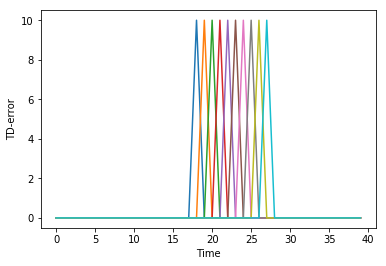

In [10]:
V = np.zeros((n_steps, len(reward_times)))
RPE = np.zeros((n_steps, len(reward_times)))

fig = plt.figure()

for i, rt in enumerate(reward_times):
    
    state = 0
    env.define_reward(reward_magnitude, rt)
    
    for t in range(n_steps):

        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        RPE[state, i] = reward + gamma * V[next_state, i] - V[state, i]
        
        state = next_state

    plt.plot(RPE[:,i])

plt.ylabel('TD-error')
plt.xlabel('Time')
plt.show()

## Ex. 4.2

Value Function after learning

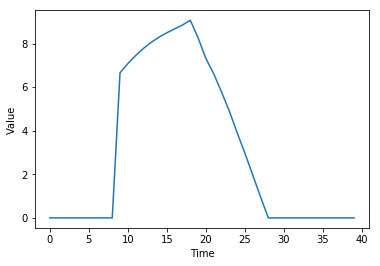

In [11]:
env = classical_conditioning(n_steps)

V = np.zeros(n_steps)
RPE = np.zeros((n_steps, n_trials))

for n in range(n_trials):
    
    state = 0
    
    if np.random.uniform(0,1) < reward_probability:
        reward_time = np.random.choice(reward_times)
        env.define_reward(reward_magnitude, reward_time)
    else:
        env.define_reward(0, 0)
    
    for t in range(n_steps):

        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        RPE[state, n] = reward + gamma * V[next_state] - V[state]
        V[state] += alpha * RPE[state, n] * is_delay
        
        state = next_state

plt.plot(V)
plt.ylabel('Value')
plt.xlabel('Time')

plt.show()

## Ex. 4.3 

TD-errors after learning

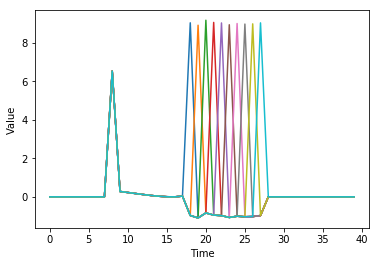

In [12]:
RPE = np.zeros((n_steps, len(reward_times)))

fig = plt.figure()

for i, rt in enumerate(reward_times):
    
    state = 0
    env.define_reward(reward_magnitude, rt)
    
    for t in range(n_steps):

        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        RPE[state, i] = reward + gamma * V[next_state] - V[state]
        
        state = next_state

    plt.plot(RPE[:,i])
    
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

# **Exercise 5: **

In this exercise we will implement a commonly used heuristic used in modeling activity of dopamine neurons, TD-reset. 
Implement TD-learning as in previous exercises, but set TD-error to zero on all steps after reward (US). 

1. Plot value function and TD-errors. 
2. Can you explain how the reset is changing the TD-erros and value function?

In [13]:
reward_times = np.arange(10,21,1)
reward_probability = 0.8

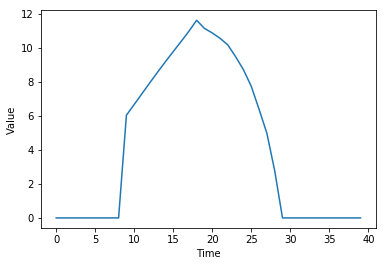

In [14]:
env = classical_conditioning(n_steps)

V = np.zeros(n_steps)
RPE = np.zeros(n_steps)

for n in range(n_trials):
    
    state = 0
    reset = 0
    
    if np.random.uniform(0,1) < reward_probability:
        reward_time = np.random.choice(reward_times)
        env.define_reward(reward_magnitude, reward_time)
    else:
        env.define_reward(0, 0)
    
    for t in range(n_steps):

        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        RPE[state] = reward + gamma * V[next_state] - V[state]
        
        if reset == 1:
            RPE[state] = 0
        
        V[state] += alpha * RPE[state] * is_delay
        
        if reward != 0:
            reset = reset + 1
            
        state = next_state
    
plt.plot(V)
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

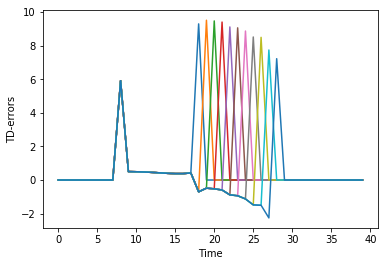

In [15]:
RPE = np.zeros((n_steps, len(reward_times)))

fig = plt.figure()

for i, rt in enumerate(reward_times):
    
    state = 0
    reset = 0
    env.define_reward(reward_magnitude, rt)
    
    for t in range(n_steps):

        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        if reset == 0:
            RPE[state, i] = reward + gamma * V[next_state] - V[state]
        
        if reward != 0:
            reset = reset + 1

        state = next_state

    plt.plot(RPE[:,i])
    
plt.ylabel('TD-errors')
plt.xlabel('Time')
plt.show()

# Exercise 6

Implement Exercise 5, after making the following small change to the environment: the next_state after reward delivery is always the ITI state, irrespective of the time of reward. 

1. Compare value functions and TD-errors in Exercise 5 with those using the modified environment. 
2. Can you explain the differences in these two cases?
3. How does this change in the state representation compare with the reset we introduced in Exercise 4 in terms of our interpretation regarding how an agent understand the classical conditioning paradigm?


In [76]:
reward_times = np.arange(10,21,1) 
reward_time = reward_times[0]
reward_magnitude = 10
reward_probability = 0.8

n_steps = 50
n_trials = 20000
gamma = 0.98  # temporal discount factor
alpha = 0.001 # learning rate

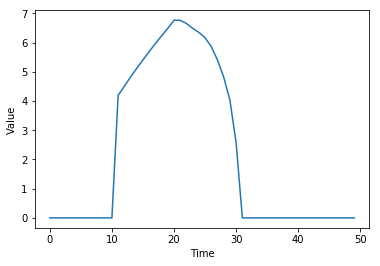

In [77]:
env = classical_conditioning(n_steps)

V = np.zeros(n_steps)
RPE = np.zeros(n_steps)

for n in range(n_trials):
    
    state = 0
    is_reward = 0
    
    if np.random.uniform(0,1) < reward_probability:
        reward_time = np.random.choice(reward_times)
        env.define_reward(reward_magnitude, reward_time)
    else:
        env.define_reward(0, 0)
        
    for t in range(n_steps):

        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        if reward != 0:
            is_reward = is_reward + 1
            
        if is_reward == 1:
            next_state = 0
        
        RPE[state] = reward + gamma * V[next_state] - V[state]
        V[state] += alpha * RPE[state] * is_delay
        
        state = next_state
    
plt.plot(V)
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

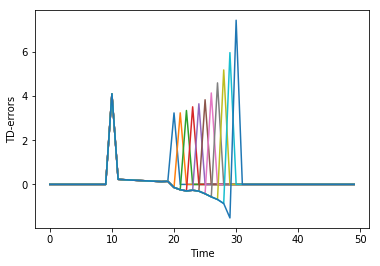

In [78]:
RPE = np.zeros((len(reward_times),n_steps))

for rt, reward_time in enumerate(reward_times):
    
    env.define_reward(reward_magnitude, reward_time)
    
    state = 0
    is_reward = 0
    
    for t in range(n_steps):
        
        next_state, reward = env.get_outcome(state)
        is_delay  = env.state_dict[state][0]
        
        if reward != 0:
            is_reward = is_reward + 1
            
        if is_reward == 1:
            next_state = 0
            
        RPE[rt, state] = reward + gamma * V[next_state] - V[state]
        state = next_state
        
    plt.plot(RPE[rt,:])

plt.ylabel('TD-errors')
plt.xlabel('Time')

plt.show()